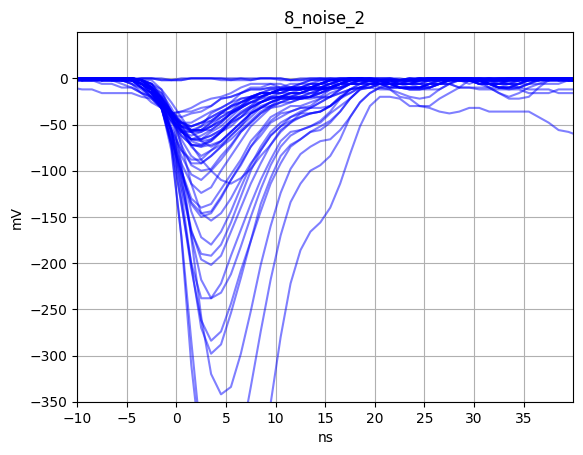

5696


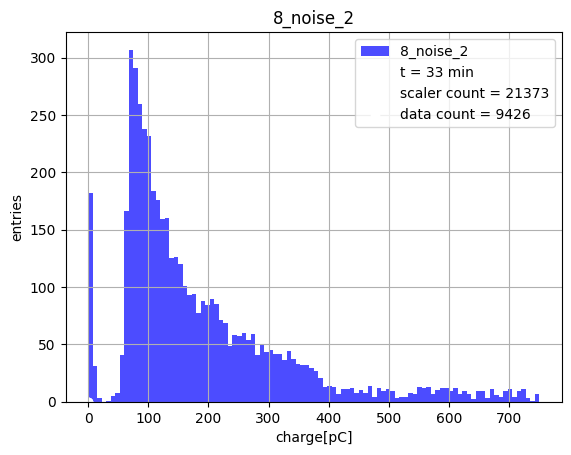

In [63]:
#課題6-1 Na
from traitlets.config.loader import FileConfigLoader
import glob
import numpy as np
import matplotlib.pyplot as plt

filename = "8_noise_2"
filelist1 = glob.glob(filename + "/*")
s0 = 21373
d0 = 9426
t0 = 33
label = filename

# color = "gray"
# color = 'green'
color = "blue"
# color='cyan'
# color='skyblue'
# color='cornflowerblue'
# color='darkturquoise'

charges1 = []
charges2 = []
charges3 = []
charges4 = []
charges5 = []
h = []
pede_list = []

def add1(list):
  count=0
  for file in list:
    count += 1

    data = np.loadtxt(file)

    time = data[:,0]
    ch1 = data[:,1]
    ch2 = data[:,2]

    time_cut = time[0: 1000]
    ch1_cut = ch1[0: 1000]
    ch2_cut = ch2[0: 1000]

    ch1_pede = ch1[0:400]
    ch1_pede2 = ch1[600:1000]
    
    deltaT = time_cut[1]-time_cut[0]
    pede = -sum(ch1_pede)*deltaT*1e-3*1e-5*1e-3/50
    pede_sum = pede 
    charge_all = -sum(ch1_cut)*deltaT*1e-3*1e-5*1e-3/50
    charge = charge_all - pede_sum*10/4

    charges1.append(charge*1e12) #10??

    # # if(charge*1e12 > 79 and charge*1e12 < 80 ):
    if(count <= 50):
      plt.plot(time, ch1, color = color, alpha=0.5)

  plt.title(filename)
  plt.xlabel("ns")
  plt.ylabel("mV")
  plt.yticks(np.arange(-350, 50, 50))
  plt.xticks(np.arange(-15, 40, 5))
  plt.grid(True, which='major', axis='both')
  # plt.grid()
  plt.xlim(-10,40)
  plt.ylim(-350,50)
  # plt.savefig(filename + "_wfm_2.png")
  plt.show()
  print(count)

def add2(list):
  count=0
  for file in list:
    count += 1

    data = np.loadtxt(file)

    time = data[:,0]
    ch1 = data[:,1]
    ch2 = data[:,2]

    time_cut = time[0: 4000]
    ch1_cut = ch1[0: 4000]
    ch2_cut = ch2[0: 4000]

    time_pede = time[0:400]
    ch1_pede = time[0:400]

    deltaT = time_cut[1]-time_cut[0]
    pede = -sum(ch1_pede)*deltaT*1e-3*1e-5*1e-3/50 *10/4
    charge_all = -sum(ch1_cut)*deltaT*1e-3*1e-5*1e-3/50
    charge = charge_all - pede

    charges2.append(charge*1e12)

  print(count)



add1(filelist1)
# add1(filelist2)
# add1(filelist3)
# add1(filelist4)
# add5(filelist5)


# print(np.max(charges))
nbin = 100



plt.hist(charges1, bins=nbin, range=(0, 750), alpha=0.7, color=color, label = label)
plt.scatter(0,0, color = 'white', label = f"t = {t0:.0f} min")
plt.scatter(0,0, color = 'white', label = f"scaler count = {s0:.0f}")
plt.scatter(0,0, color = 'white', label = f"data count = {d0:.0f}")
plt.title(filename)
plt.xlabel("charge[pC]")
plt.ylabel("entries")
plt.grid()
plt.legend()
plt.ylim(bottom = 0)
plt.savefig(filename + ".png")
plt.show()

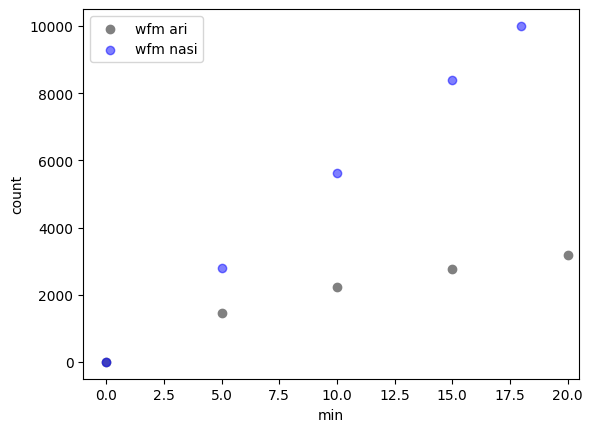

In [55]:
t_ari = [0, 5, 10, 15, 20]
s_ari = [0, 168728, 335978, 503339, 671479]
d_ari = [0, 1460, 2240, 2770, 3170]
t_nasi = [0, 5, 10, 15, 18]
s_nasi = [0, 169418, 337289, 504668, 615363]
d_nasi = [0, 2790, 5610, 8390, 10000]

plt.scatter(t_ari, d_ari, color = "gray", label="wfm ari")
plt.scatter(t_nasi, d_nasi, color = "blue",alpha = 0.5, label="wfm nasi")
plt.xlabel('min')
plt.ylabel('count')
plt.legend()
plt.xlim(-1,20.5)
plt.ylim(-500, 10500)
plt.savefig("datarate.png")
plt.show()

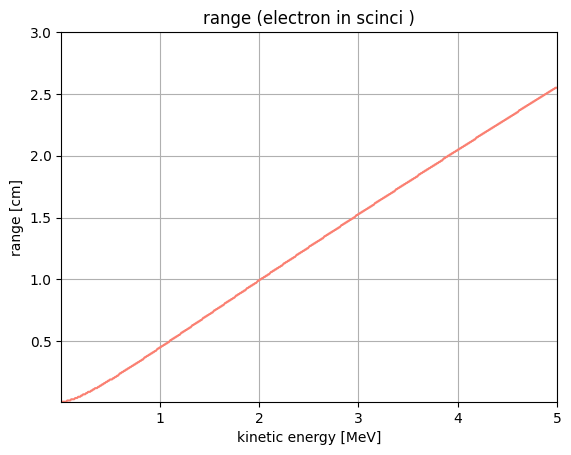

In [56]:
#Bethe 6
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#electron、霧箱のプリントとスケール合わせたもの
#グラフプロット用
#飛程がどれくらいか見る用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 3.3  #空気の平均原子番号
A = 6.64  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 0.511 #eleの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 1.03  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.01
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.001: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = []
y_length = []

#0.01~5MeVまで0.01刻みで
for i in range(1, 500, 1):
    xi = i/100
    x_energy.append(xi)
    y_length.append(stop(xi+0.511))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length, color = "salmon") 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (electron in scinci )")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.01, 5)
plt.ylim(0.01, 3)
#plt.vlines(x=0.589, ymin=0, ymax=15.23, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=55.741, ymin=0, ymax=10.68, color='royalblue', linestyle='-', linewidth=10, alpha=0.3)
#plt.vlines(x=1.485, ymin=0, ymax=10.00, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=1.273, ymin=0, ymax=11.82, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
#plt.vlines(x=1.103, ymin=0, ymax=10.91, color='royalblue', linestyle='-', linewidth=20, alpha=0.3)
# plt.xscale('log')
# plt.yscale('log')
plt.grid() 
plt.show()